## 파일 읽기

In [1]:
import pandas as pd
import numpy as np

df20 = pd.read_csv("news_comments_Naver_coin_20_34.csv")
df21 = pd.read_csv("news_comments_Naver_coin_21_34.csv")

## 전처리

In [2]:
df20.dropna(inplace=True)
df21.dropna(inplace=True)

data20 = np.array(df20['contents'].tolist())
data21 = np.array(df21['contents'].tolist())

df_20 = "".join(data20)
df_21 = "".join(data21)

In [3]:
from konlpy.tag import Okt

t = Okt()

df20 = t.nouns(df_20)
df21 = t.nouns(df_21)

In [4]:
print('# 20년 : ', df20[:100])
print()
print('# 21년 : ', df21[:100])

# 20년 :  ['대디', '수', '남성', '번방', '사건', '보고', '글', '주변', '그', '따위', '남자', '스스로', '한번', '비트코인', '갑자기', '페미니스트', '승리', '시민', '고문', '언문', '사람', '중학생', '글더', '일기', '장임', '기자', '암호', '화폐', '거래', '대포통장', '뭐', '말', '살', '이자', '아', '원시인', '최고다', '요', '줄', '쓰면될껄', '헛소리', '현금', '젤', '마이', '현금', '케', '자슥', '비트코인', '것', '사리', '느낌', '건', '나', '뿐', '글', '보고', '기자', '줄', '시대', '대처', '거지', '미성년', '로켓', '법', '노인', '발', '대처', '정치인', '문과', '고작', '생각', '게', '정도', '꼭', '번방', '신분증', '모션', '인증', '가입', '등', '여성시대', '고발기', '사나', '욥', '비트코인', '개발자', '타오', '요즘', '기자', '글', '수준', '일기장', '만년', '동안', '세계', '온', '인간', '가장', '본능', '욕구']

# 21년 :  ['일기', '일기장', '오', '기자', '며칠', '직접', '나니', '누구', '장난', '해도', '직접', '경험', '사람', '라면', '기자', '경험', '알', '것임', '이', '기사', '니', '걸', '누구', '탓', '해', '넌', '주식', '왜', '내', '사면', '팔면', '주식', '코인', '가격', '정도', '점', '때', '점', '조금', '더', '이치', '반대', '이제', '아야', '최고점', '더', '그', '전문가', '최저', '점', '최고점', '이론', '드니', '스트레스', '임', '주', '젤', '거기', '뭐', '주가', '주주', '제발', '사고', '기전', '타지', '횡

In [13]:
print(type(df20))

<class 'list'>


In [10]:
# 불용어 사전

stop_words = ['때', '지금', '것', '더', '이', '말', '그', '거', '왜', '뭐', '수', '지금', '말', '그냥', '뭐', '일', '집', '놈', '니',
             '진짜', '좀', '수', '제발', '저', '탓', '저런']

df20 = [word for word in df20 if word not in stop_words]
df21 = [word for word in df21 if word not in stop_words]

In [11]:
# 빈도수 사전

dict_20 = {}
dict_21 = {}

for word in df20:
    dict_20[word] = dict_20.get(word, 0) + 1

for word in df21:
    dict_21[word] = dict_21.get(word, 0) + 1

s_dict_20 = sorted(dict_20, key=dict_20.get, reverse=True)
s_dict_21 = sorted(dict_21, key=dict_21.get, reverse=True)

print('# 20년 상위 20개 : ')
for key in s_dict_20[:20]:
    print(f'{repr(key)} : {dict_20[key]}')

print()
print('# 21년 상위 20개 : ')
for key in s_dict_21[:20]:
    print(f'{repr(key)} : {dict_21[key]}')    

# 20년 상위 20개 : 
'사람' : 782
'처벌' : 523
'개미' : 384
'생각' : 365
'주식' : 333
'공개' : 329
'인간' : 316
'사형' : 287
'남자' : 284
'돈' : 283
'신상' : 274
'기사' : 272
'아이' : 252
'투자' : 206
'정말' : 199
'모두' : 198
'가해자' : 188
'피해자' : 186
'사회' : 163
'코로나' : 161

# 21년 상위 20개 : 
'코인' : 1606
'돈' : 1591
'정부' : 1139
'투자' : 1064
'사람' : 1007
'투기' : 901
'주식' : 857
'화폐' : 855
'도박' : 766
'가상' : 698
'나라' : 560
'생각' : 531
'비트코인' : 474
'세금' : 438
'국민' : 417
'기사' : 397
'민주당' : 340
'가치' : 324
'보호' : 318
'부동산' : 307


## 수평 막대 그래프

### **2020년 3-4월**

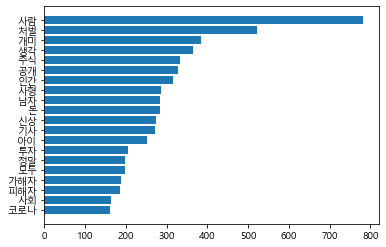

In [12]:
from matplotlib import font_manager, rc
import matplotlib.pyplot as plt
%matplotlib inline

font_name = font_manager.FontProperties(fname='c:/Windows/Fonts/malgun.ttf').get_name()
rc('font', family=font_name)

n = s_dict_20[:20][::-1]
w = [dict_20[key] for key in n]

plt.barh(range(len(n)), w, tick_label=n)
plt.show()

### **2021년 3~4월**

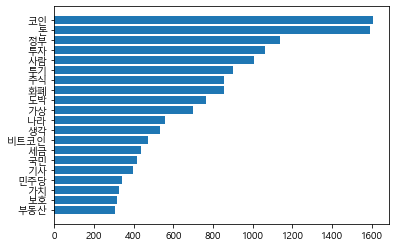

In [13]:
font_name = font_manager.FontProperties(fname='c:/Windows/Fonts/malgun.ttf').get_name()
rc('font', family=font_name)

n = s_dict_21[:20][::-1]
w = [dict_21[key] for key in n]

plt.barh(range(len(n)), w, tick_label=n)
plt.show()

## 유사도 계산

In [14]:
wf_20 = s_dict_20[:1000]
wf_21 = s_dict_21[:1000]

In [15]:
from sklearn.feature_extraction.text import CountVectorizer

cv20 = CountVectorizer(vocabulary=wf_20)
cv21 = CountVectorizer(vocabulary=wf_21)

In [16]:
df20_cv = cv20.fit_transform([df_20])
df21_cv = cv21.fit_transform([df_21])

In [17]:
from sklearn.metrics.pairwise import cosine_similarity

sim_result = cosine_similarity(df20_cv, df21_cv)
print(sim_result)

[[0.45304149]]
